In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('paper')
sns.set(font_scale=1.5)

In [3]:
records = np.load('/artemis/readout/archive/2016-12-12-stanford-almn-res2-temp-sweep.npz')['records']

In [4]:
records.shape

(61,)

In [5]:
records.dtype.fields.keys()

['res_f_min_error',
 'res_Q_e_real',
 'res_frequency_data',
 'res_Q_error',
 'sweep.root_path',
 'number',
 'res_delay_error',
 'sweep.node_path',
 'res_model_s21',
 'res_f_0_error',
 'start_epoch',
 'roach_modulation_output',
 'stream.root_path',
 'res_f_min',
 'res_A_slope',
 'index',
 'S_xx',
 'S_xy',
 'res_phi_error',
 'roach_heterodyne',
 'roach_num_tone_samples',
 'res_Q_e_real_error',
 'res_f_0',
 'roach_hardware_delay_samples',
 'res_model_s21_at_f_0',
 'res_model_frequency',
 'res_redchi',
 'roach_adc_sample_rate',
 'res_A_slope_error',
 'res_Q_i',
 'res_A_mag',
 'res_Q_e',
 'roach_reference_sequence_number',
 'res_model_s21_normalized',
 'package_temperature',
 'res_Q_e_imag_error',
 'roach_debug_register',
 'roach_lo_frequency',
 'analysis_epoch',
 'S_frequency',
 'res_delay',
 'roach_num_tones',
 'stream.node_path',
 'io_class',
 'res_s21_data_normalized',
 'res_A_mag_error',
 'S_yy',
 'res_phi',
 'res_model_s21_normalized_at_f_0',
 'roach_loopback',
 'roach_fft_shift_regis

In [6]:
Q = records['res_Q']
Q_err = records['res_Q_error']
iQ = 1/Q
iQi = 1/records['res_Q_i']
iQerr = Q_err/Q**2
tt = records['package_temperature']
f_0 = records['res_f_0']
f_0_err = records['res_f_0_error']
x = 1-f_0/f_0.max()
x_err = f_0_err/f_0.max()

In [7]:
import lmfit

In [8]:
def exp_model(T,scale,shift,offset):
    return np.exp(T/scale+shift) + offset

In [9]:
T = np.linspace(50e-3,250e-3,100)

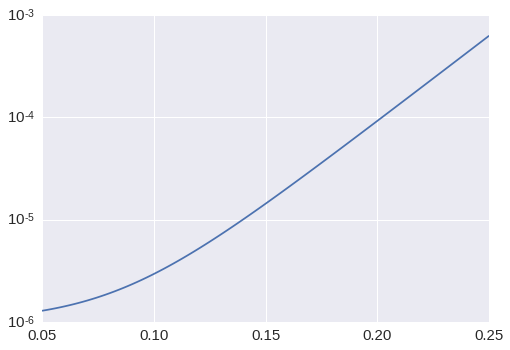

In [24]:
semilogy(T,exp_model(T,26e-3,-17,1e-6))

In [25]:
iqi_model = lmfit.Model(exp_model,independent_vars=['T'])
#x_model = lmfit.Model(xtotal,independent_vars=['T'])

In [110]:
def iqiguess(self,**kwargs):
    p = lmfit.Parameters()
    p.add(name='scale',value=26e-3,min=0,max=0.1)
    p.add(name='shift',value=-17,min=-100,max=0)
    p.add(name='offset',value=0,min=-1e-4,max=1e-3)
    return p
iqi_model.guess = iqiguess


In [127]:
lmfit.ui.ipy_fitter??

In [29]:
import lmfit
import lmfit.ui

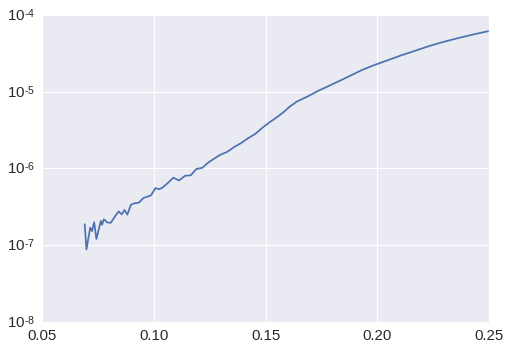

In [70]:
semilogy(tt,iQi-5e-6)

In [84]:
mask = tt<0.17

In [134]:
ftr = lmfit.ui.Fitter(iQi[mask]-5e-6,T=tt[mask],model=iqi_model,weights=1/iQerr[mask])

In [136]:
ftr.fit()

In [137]:
ftr.current_params

Parameters([('scale',
             <Parameter 'scale', 0.021255627844415415, bounds=[0:0.1]>),
            ('shift',
             <Parameter 'shift', -19.58633036416461, bounds=[-100:0]>),
            ('offset',
             <Parameter 'offset', 9.3120827924665487e-08, bounds=[-0.0001:0.001]>)])

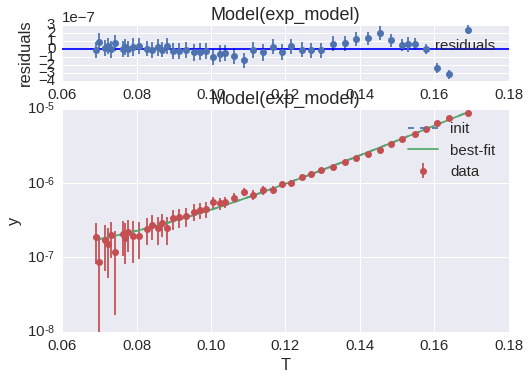

In [138]:
blah=ftr.current_result.plot()
yscale('log')

In [139]:
print ftr.current_result.fit_report()

[[Model]]
    Model(exp_model)
[[Fit Statistics]]
    # function evals   = 6
    # data points      = 47
    # variables        = 3
    chi-square         = 81.424
    reduced chi-square = 1.851
    Akaike info crit   = 34.928
    Bayesian info crit = 40.478
[[Variables]]
    scale:    0.02125562 +/- 0.000379 (1.78%) (init= 0.02125563)
    shift:   -19.5863303 +/- 0.140391 (0.72%) (init=-19.58633)
    offset:   9.3121e-08 +/- 3.39e-08 (36.45%) (init= 9.311631e-08)
[[Correlations]] (unreported correlations are <  0.100)
    C(scale, shift)              =  0.999 
    C(shift, offset)             = -0.746 
    C(scale, offset)             = -0.725 



In [140]:
res=ftr.current_result.emcee(burn=500)

In [101]:
import corner

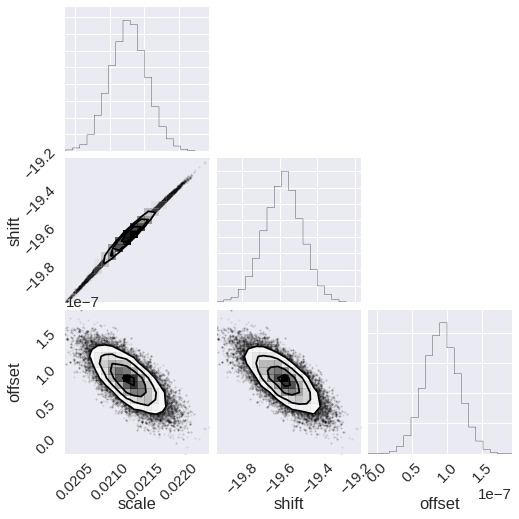

In [141]:
_=corner.corner(res.flatchain)

In [124]:
ftr??

In [122]:
ftr = lmfit.ui.Fitter(x[mask],T=tt[mask],model=iqi_model,weights=1e-2/x_err[mask])

In [125]:
ftr.fit()

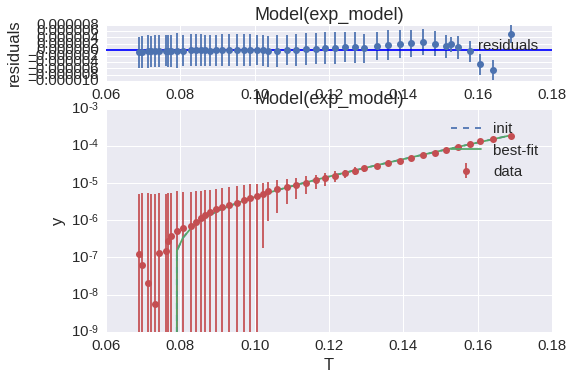

In [126]:
_=ftr.current_result.plot()
yscale('log')

In [131]:
ftr.current_params

Parameters([('scale',
             <Parameter 'scale', 0.020069161220676531, bounds=[0:0.1]>),
            ('shift',
             <Parameter 'shift', -16.965398225595607, bounds=[-100:0]>),
            ('offset',
             <Parameter 'offset', -2.0607093558737134e-06, bounds=[-0.0001:0.001]>)])

In [127]:
print ftr.current_result.fit_report()

[[Model]]
    Model(exp_model)
[[Fit Statistics]]
    # function evals   = 6
    # data points      = 47
    # variables        = 3
    chi-square         = 11.086
    reduced chi-square = 0.252
    Akaike info crit   = -58.788
    Bayesian info crit = -53.238
[[Variables]]
    scale:    0.02006916 +/- 0.000297 (1.48%) (init= 0.02006916)
    shift:   -16.9653982 +/- 0.123256 (0.73%) (init=-16.9654)
    offset:  -2.0607e-06 +/- 5.97e-07 (28.97%) (init=-2.060714e-06)
[[Correlations]] (unreported correlations are <  0.100)
    C(scale, shift)              =  0.999 
    C(shift, offset)             = -0.718 
    C(scale, offset)             = -0.698 



In [128]:
res=ftr.current_result.emcee(burn=500)

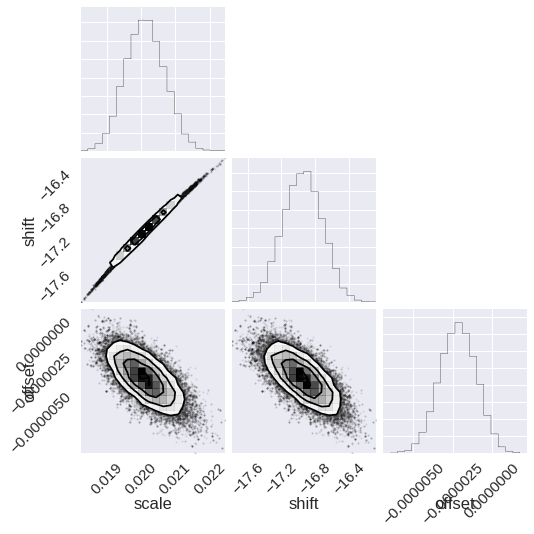

In [129]:
_=corner.corner(res.flatchain)

In [162]:
def global_lnprior(params):
    scale,shift_x,shift_q,offset_x,offset_q,efacx = params
    if 0 > scale or scale > .1:
        return -np.inf
    if -100 > shift_x or shift_x > 0:
        return -np.inf
    if -100 > shift_q or shift_q > 0:
        return -np.inf
    if -1e-4 > offset_x or offset_x > 1e-4:
        return -np.inf
    if 0 > offset_q or offset_q > 1e-3:
        return -np.inf
    if efacx < 1 or efacx > 300:
        return -np.inf
#    if efacq < 1 or efacq > 1e4:
#        return -np.inf
    return 0

def global_lnlike(params,T_data,iqi_data,iqi_error,x_data,x_error):
    prior = global_lnprior(params)
    if prior == -np.inf:
        return -np.inf
    scale,shift_x,shift_q,offset_x,offset_q,efacx = params
    efacq = 1
    #print params
    iqi_predict = exp_model(T_data,scale=scale,shift=shift_q,offset=offset_q)
    x_predict = exp_model(T_data,scale=scale,shift=shift_x,offset=offset_x)
    inv_sigma2_q = 1/(iqi_error*efacq)**2
    inv_sigma2_x = 1/(x_error*efacx)**2
    iqi_deviates = (iqi_predict - iqi_data)**2 * inv_sigma2_q
    x_deviates = (x_predict-x_data)**2 * inv_sigma2_x
    return prior - ((iqi_deviates - np.log(inv_sigma2_q)).sum()
              + (x_deviates - np.log(inv_sigma2_x)).sum())




In [143]:
import emcee

In [163]:
samp = emcee.EnsembleSampler(32,6,global_lnlike,args=(tt[mask],iQi[mask],iQerr[mask],x[mask],x_err[mask]))

In [164]:
p0 = np.array([20e-3,-19,-17,0,0,100])[None,:] + np.random.rand(32,6)*np.array([1e-3,5,5,1e-5,1e-4,10])

In [167]:
p0 = samp.flatchain.mean(0)[None,:] + np.random.rand(32,6)*np.array([1e-3,5,5,1e-5,1e-4,10])

In [176]:
p0 = samp.flatchain.mean(0)[None,:]*(np.ones((32,6))+ np.random.rand(32,6)*1e-6)

In [146]:
#p0 = samp.flatchain.mean(0)[None,:] + 1e-3*np.random.rand(64,8)*np.array([.1,.1,.1,2,2,1e-5,1e-4,1000])

In [408]:
samp.flatchain.shape

(640000, 8)

In [357]:
samp.chain.shape

(64, 0, 8)

In [177]:
#p0 = np.median(samp.chain[:,:,:],axis=1)
samp.reset()
samp.run_mcmc(p0,2000)
p0 = np.median(samp.chain[:,-1000:,:],axis=1)
samp.reset()
samp.run_mcmc(p0,5000)

(array([[  2.07682297e-02,  -1.66835649e+01,  -1.97710959e+01,
          -3.65637323e-06,   5.12963850e-06,   5.04765457e+01],
        [  2.07199425e-02,  -1.67024567e+01,  -1.97945064e+01,
          -3.19729098e-06,   5.14414784e-06,   5.21669112e+01],
        [  2.09969136e-02,  -1.65903961e+01,  -1.96775201e+01,
          -3.87236427e-06,   5.09733921e-06,   5.28944336e+01],
        [  2.07134668e-02,  -1.67121530e+01,  -1.97847590e+01,
          -2.67007811e-06,   5.10127436e-06,   5.56308463e+01],
        [  2.09919830e-02,  -1.65994849e+01,  -1.96841029e+01,
          -2.74642778e-06,   5.10052336e-06,   5.11372283e+01],
        [  2.08546182e-02,  -1.66576437e+01,  -1.97405560e+01,
          -2.87853811e-06,   5.12904421e-06,   5.17279590e+01],
        [  2.05378732e-02,  -1.67730384e+01,  -1.98626386e+01,
          -2.71020020e-06,   5.12943442e-06,   5.49702588e+01],
        [  2.07198725e-02,  -1.66979127e+01,  -1.97919953e+01,
          -2.97760334e-06,   5.12169968e-06,   5

In [169]:
p0 = np.median(samp.chain[:,:,:],axis=1)
samp.reset()
samp.run_mcmc(p0,10000)

(array([[  2.02110545e-02,  -3.41167830e+01,  -1.98534661e+01,
           5.91924521e-05,   5.00159356e-06,   1.60683220e+02],
        [  2.07802249e-02,  -1.66784575e+01,  -1.97647377e+01,
          -2.94272087e-06,   5.12139693e-06,   5.17341534e+01],
        [  2.08235908e-02,  -1.66680548e+01,  -1.97449227e+01,
          -2.85996273e-06,   5.10261431e-06,   4.93266957e+01],
        [  2.08671230e-02,  -1.66487244e+01,  -1.97302127e+01,
          -3.26102741e-06,   5.11193393e-06,   4.98249110e+01],
        [  2.07428825e-02,  -1.66963190e+01,  -1.97795071e+01,
          -2.97087741e-06,   5.11785983e-06,   5.63453064e+01],
        [  2.07965332e-02,  -1.66766815e+01,  -1.97608904e+01,
          -2.92422095e-06,   5.12561261e-06,   5.33909025e+01],
        [  2.06911925e-02,  -1.67189250e+01,  -1.98010651e+01,
          -2.48012766e-06,   5.13155878e-06,   5.93060508e+01],
        [  2.05965850e-02,  -1.67517991e+01,  -1.98401494e+01,
          -2.68693723e-06,   5.14591963e-06,   5

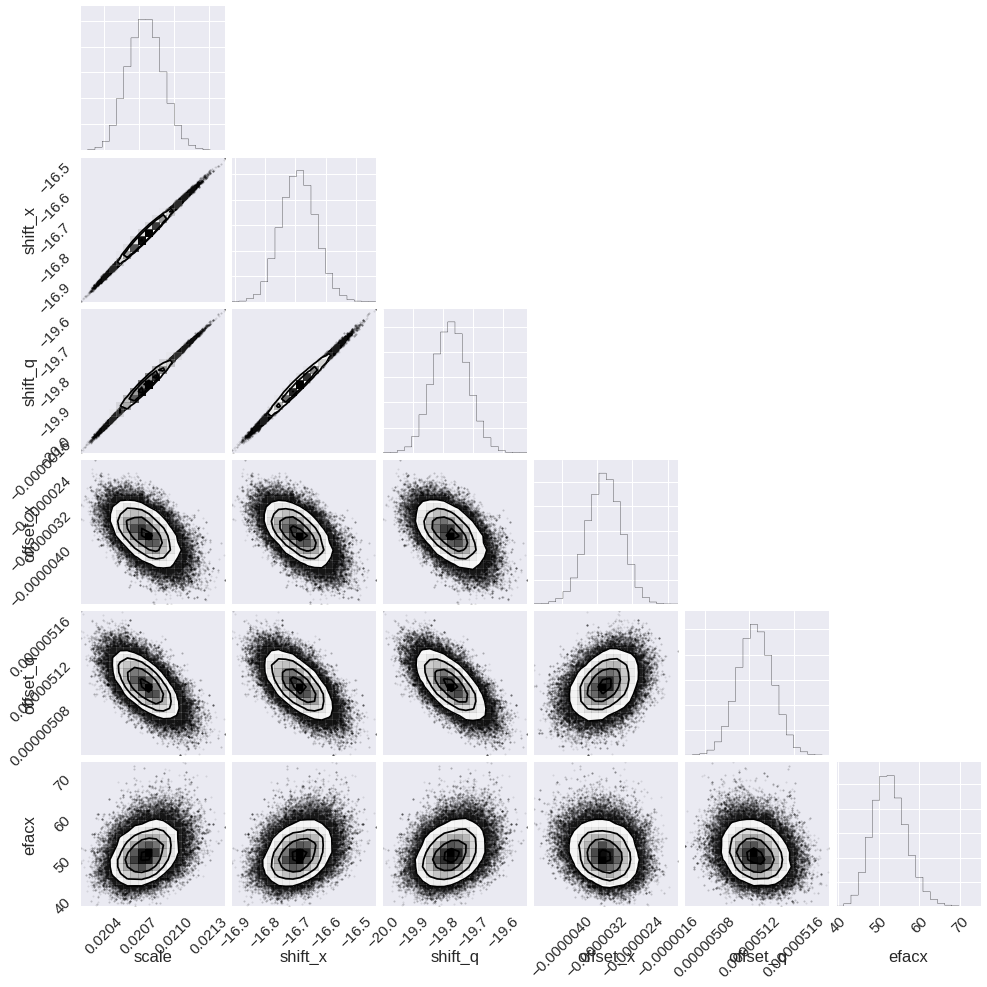

In [178]:
_ = corner.corner(samp.flatchain,labels=['scale','shift_x','shift_q','offset_x','offset_q','efacx'])

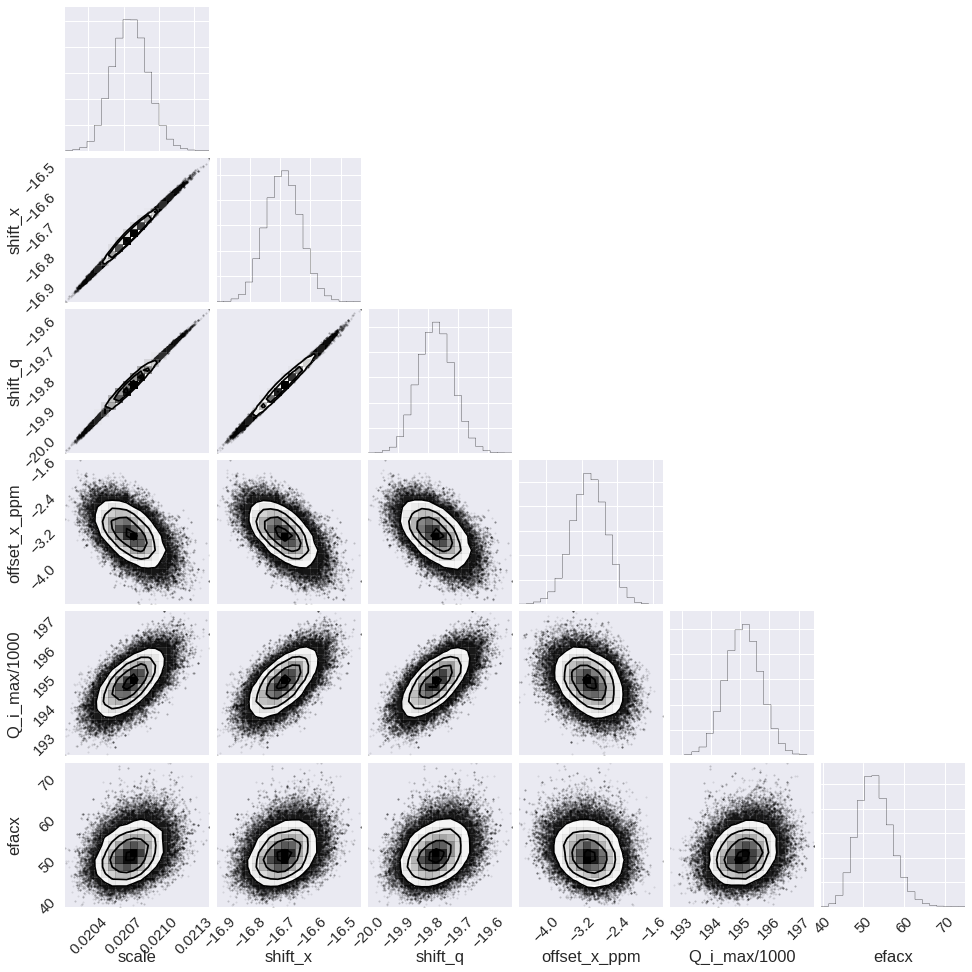

In [208]:
transformed_chain = samp.flatchain.copy()
transformed_chain[:,3] = transformed_chain[:,3]*1e6
transformed_chain[:,4] = 1e-3/transformed_chain[:,4]
_ = corner.corner(transformed_chain,labels=['scale','shift_x','shift_q','offset_x_ppm','Q_i_max/1000','efacx'])
savefig('/home/gjones/paper_plots/iqi_x_joint_exponential_corner.pdf',bbox_inches='tight')

In [ ]:
1

In [380]:
10**-6.5

3.162277660168379e-07

In [210]:
samp.flatchain.mean(0)

array([  2.07565982e-02,  -1.66905351e+01,  -1.97755323e+01,
        -3.03544701e-06,   5.12540650e-06,   5.27963253e+01])

In [308]:
samp.flatchain.shape

(640000, 8)

In [ ]:
#(tt,iQ,iQerr,x,x_err)

In [211]:
nominal

array([  2.07565982e-02,  -1.66905351e+01,  -1.97755323e+01,
        -3.03544701e-06,   5.12540650e-06,   5.27963253e+01])

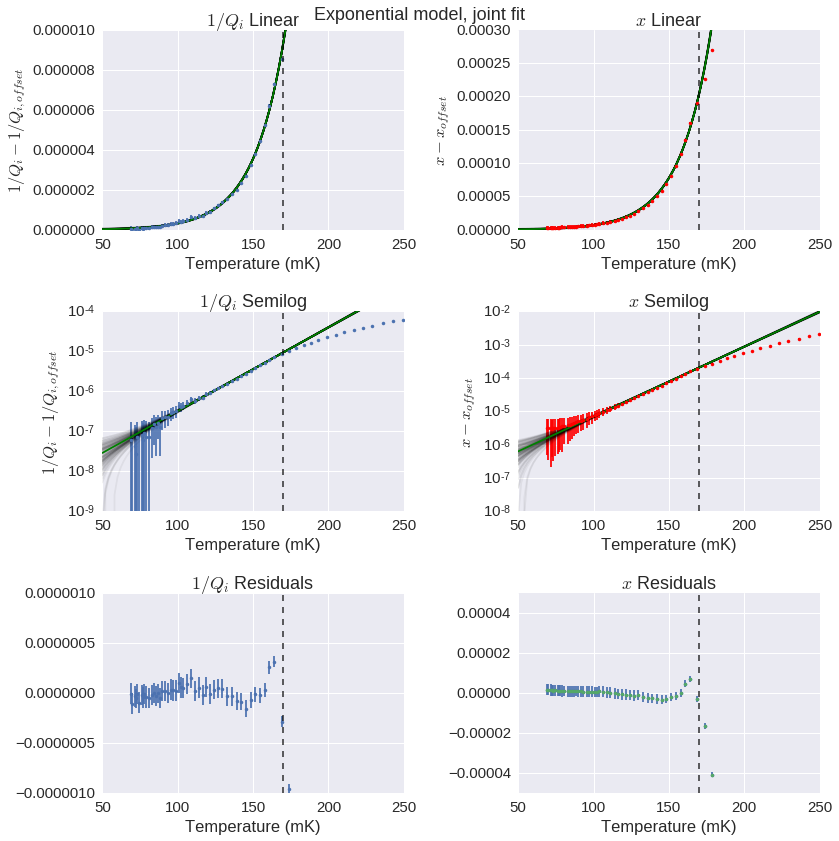

In [209]:
def eval_params(params,T):
    scale,shift_x,shift_q,offset_x,offset_q,efacx = params
    efacq = 1
    #print params
    iqi_predict = exp_model(T,scale=scale,shift=shift_q,offset=offset_q)
    x_predict = exp_model(T,scale=scale,shift=shift_x,offset=offset_x)
    return iqi_predict,x_predict
#def plot_results(flatchain):
labels=['Tc','alpha_x','alpha_q','tls_x','tls_q','x0','iqi0','efacx']
nominal = samp.flatchain.mean(0)
scale,shift_x,shift_q,offset_x,offset_q,efacx = nominal
#Tc,alpha_x,alpha_q,tls_x,tls_q,x0,iqi0,efacx = nominal
#efacx=200
fig,axs=subplots(3,2,figsize=(12,12))
ax1a,ax2a,ax1b,ax2b,ax3,ax4 = axs.flatten()
for ax1,ax2 in [(ax1a,ax2a),(ax1b,ax2b)]:
    for k in range(100):
        params = samp.flatchain[np.random.randint(0,samp.flatchain.shape[0]-1),:]
        iqip,xp = eval_params(params,T)
        ax1.plot(T*1000,iqip-offset_q,alpha=.05,color='k')
        ax2.plot(T*1000,xp-offset_x,alpha=.05,color='k')
    iqip,xp = eval_params(nominal,T)
    ax1.plot(T*1000,iqip-offset_q,color='g')
    ax2.plot(T*1000,xp-offset_x,color='g')

    ax1.errorbar(tt*1000,iQi-offset_q,yerr=iQerr,linestyle='',marker='.')
    ax2.errorbar(tt*1000,x-offset_x,yerr=x_err*efacx,linestyle='',color='r',marker='.')
    ax2.errorbar(tt*1000,x-offset_x,yerr=x_err,linestyle='')
    ax1.set_ylabel('$1/Q_i-1/Q_{i,offset}$')
    ax2.set_ylabel('$x-x_{offset}$')
ax1b.set_yscale('log')
ax2b.set_yscale('log')
ax1b.set_ylim(1e-9,1e-4)
ax2b.set_ylim(1e-8,1e-2)
ax1a.set_ylim(1e-9,1e-5)
ax2a.set_ylim(1e-8,3e-4)

iqi_nom,x_nom = eval_params(nominal,tt)
ax3.errorbar(tt*1000,iQi-iqi_nom,yerr=iQerr,linestyle='',marker='.')
ax4.errorbar(tt*1000,x-x_nom,yerr=x_err*efacx,linestyle='',marker='.')
ax4.errorbar(tt*1000,x-x_nom,yerr=x_err,linestyle='',marker='.')
ax3.set_ylim(-1e-6,1e-6)
ax4.set_ylim(-5e-5,5e-5)
for ax in axs.flatten():
    ax.axvline(170,linestyle='--',color='k',alpha=0.7)
    ax.set_xlabel('Temperature (mK)')
ax1a.set_title('$1/Q_i$ Linear')
ax2a.set_title('$x$ Linear')
ax1b.set_title('$1/Q_i$ Semilog')
ax2b.set_title('$x$ Semilog')
ax3.set_title('$1/Q_i$ Residuals')
ax4.set_title('$x$ Residuals')
fig.suptitle('Exponential model, joint fit')
fig.tight_layout()
fig.savefig('/home/gjones/paper_plots/iqi_x_exponential_model_joint_fit_summary.pdf',bbox_inches='tight')

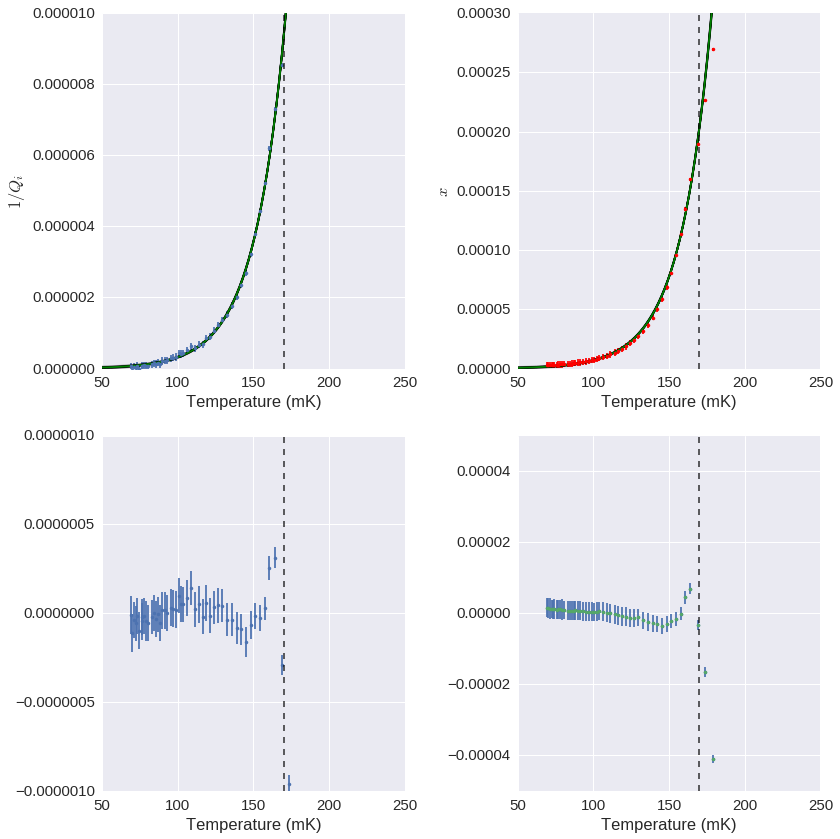

In [202]:
def eval_params(params,T):
    scale,shift_x,shift_q,offset_x,offset_q,efacx = params
    efacq = 1
    #print params
    iqi_predict = exp_model(T,scale=scale,shift=shift_q,offset=offset_q)
    x_predict = exp_model(T,scale=scale,shift=shift_x,offset=offset_x)
    return iqi_predict,x_predict
#def plot_results(flatchain):
labels=['Tc','alpha_x','alpha_q','tls_x','tls_q','x0','iqi0','efacx']
nominal = samp.flatchain.mean(0)
scale,shift_x,shift_q,offset_x,offset_q,efacx = nominal
#Tc,alpha_x,alpha_q,tls_x,tls_q,x0,iqi0,efacx = nominal
#efacx=200
fig,axs=subplots(2,2,figsize=(12,12))
ax1,ax2,ax3,ax4 = axs.flatten()
for k in range(100):
    params = samp.flatchain[np.random.randint(0,samp.flatchain.shape[0]-1),:]
    iqip,xp = eval_params(params,T)
    ax1.plot(T*1000,iqip-offset_q,alpha=.05,color='k')
    ax2.plot(T*1000,xp-offset_x,alpha=.05,color='k')
iqip,xp = eval_params(nominal,T)
ax1.plot(T*1000,iqip-offset_q,color='g')
ax2.plot(T*1000,xp-offset_x,color='g')

ax1.errorbar(tt*1000,iQi-offset_q,yerr=iQerr,linestyle='',marker='.')
ax2.errorbar(tt*1000,x-offset_x,yerr=x_err*efacx,linestyle='',color='r',marker='.')
ax2.errorbar(tt*1000,x-offset_x,yerr=x_err,linestyle='')
#ax1.set_yscale('log')
#ax2.set_yscale('log')
#ax2.set_ylim(1e-8,5e-3)
ax1.set_ylim(1e-9,1e-5)
ax2.set_ylim(1e-8,3e-4)

iqi_nom,x_nom = eval_params(nominal,tt)
ax3.errorbar(tt*1000,iQi-iqi_nom,yerr=iQerr,linestyle='',marker='.')
ax4.errorbar(tt*1000,x-x_nom,yerr=x_err*efacx,linestyle='',marker='.')
ax4.errorbar(tt*1000,x-x_nom,yerr=x_err,linestyle='',marker='.')
ax3.set_ylim(-1e-6,1e-6)
ax4.set_ylim(-5e-5,5e-5)
for ax in axs.flatten():
    ax.axvline(170,linestyle='--',color='k',alpha=0.7)
    ax.set_xlabel('Temperature (mK)')
ax1.set_ylabel('$1/Q_i$')
ax2.set_ylabel('$x$')
fig.tight_layout()

In [362]:
nominal

array([  6.90132082e-01,   1.63444202e-01,   1.01395935e-01,
        -8.77251785e+00,  -1.76757448e+65,   2.70560349e-06,
         1.13620863e-05,   1.85683498e+02])